In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv(r'C:\Users\jeand\Desktop\test.txt') # Replace with your file path
df.columns = ['timestamp', 'kW']  # Replace all column names
                    

In [140]:
# Convert timestamp column to datetime if it's not already
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms').dt.tz_localize('UTC').dt.tz_convert('Europe/Paris')
#, format='%Y-%m-%d %H:%M:%S')


In [141]:
from datetime import datetime, timezone

timestamp_ms = 1752684226696

# Convert to seconds (dividing by 1000) and create datetime
dt = datetime.fromtimestamp(timestamp_ms / 1000, tz=timezone.utc)

print(dt.isoformat())  # Output: 2025-07-16T16:43:46.696000+00:00

2025-07-16T16:43:46.696000+00:00


In [142]:
df

,timestamp,kW
0,2025-07-16 19:26:22.153000+02:00,0.13
1,2025-07-16 19:26:50.910000+02:00,0.12
2,2025-07-16 19:27:19.404000+02:00,0.13
3,2025-07-16 19:27:47.788000+02:00,0.13
4,2025-07-16 19:28:15.008000+02:00,0.13
...,...,...
136,2025-07-16 20:24:12.814000+02:00,0.13
137,2025-07-16 20:24:38.054000+02:00,0.13
138,2025-07-16 20:25:06.286000+02:00,0.13
139,2025-07-16 20:25:34.933000+02:00,0.12


In [143]:
#df.kW.plot(x=df.timestamp,grid=True)
df = df.set_index('timestamp')  # Set timestamp as index (important for clean plotting)
df

,kW
timestamp,
2025-07-16 19:26:22.153000+02:00,0.13
2025-07-16 19:26:50.910000+02:00,0.12
2025-07-16 19:27:19.404000+02:00,0.13
2025-07-16 19:27:47.788000+02:00,0.13
2025-07-16 19:28:15.008000+02:00,0.13
...,...
2025-07-16 20:24:12.814000+02:00,0.13
2025-07-16 20:24:38.054000+02:00,0.13
2025-07-16 20:25:06.286000+02:00,0.13


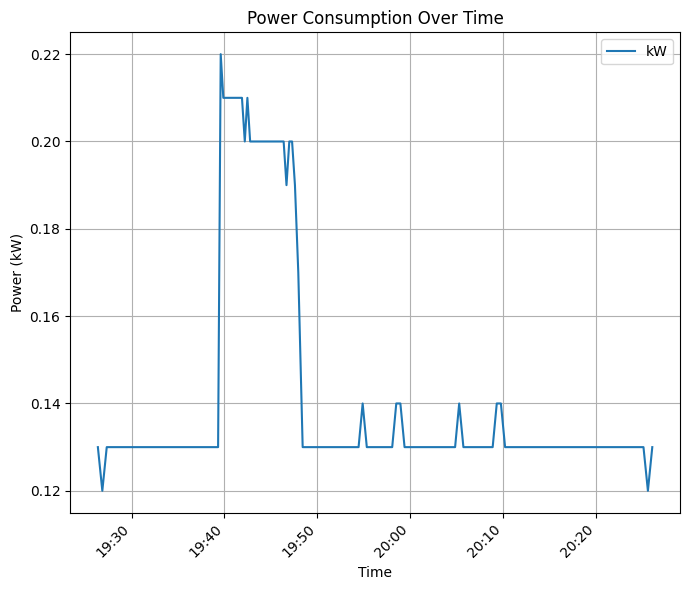

In [146]:

# Create the plot
ax = df.plot(y='kW', figsize=(7, 6), grid=True)

# Customize the plot
ax.set_title('Power Consumption Over Time')
ax.set_ylabel('Power (kW)')
ax.set_xlabel('Time')

# Improve x-axis formatting
ax.xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%H:%M', tz='Europe/Paris')
)
plt.xticks(rotation=45)
plt.tight_layout()

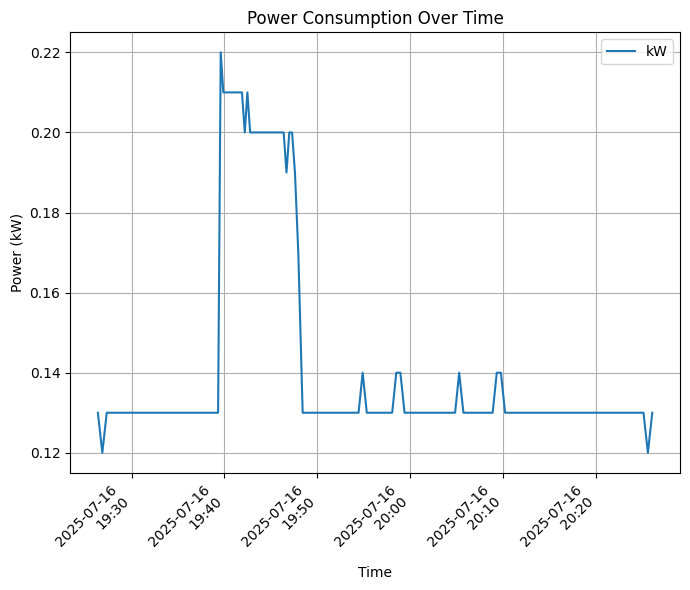

In [148]:
# Plotting
# Create the plot
ax = df.plot(y='kW', figsize=(7, 6), grid=True)    
# Customize the plot
ax.set_title('Power Consumption Over Time')
ax.set_ylabel('Power (kW)')
ax.set_xlabel('Time')

# Improve x-axis formatting
ax.xaxis.set_major_formatter(
    plt.matplotlib.dates.DateFormatter('%Y-%m-%d\n%H:%M', tz='Europe/Paris')
)
plt.xticks(rotation=45)
plt.tight_layout()                     